# Mediapipe hands model test

./imgs/hand-made-stop-sign-and-palms.jpg


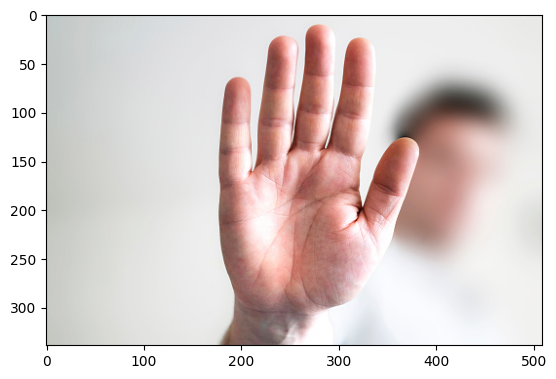

In [34]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480


def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(
            image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(
            image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    plt.figure()
    # BGR (opencv) --> RGB (matplotlib)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.imshow(image[:,:,::-1])


# Read images with OpenCV.
IMAGE_FILES = ['./imgs/hand-made-stop-sign-and-palms.jpg']
images = {name: cv2.imread(name)
          for name in IMAGE_FILES}  # opencv read BGR image
# Preview the images.
# Preview the images.
for name, image in images.items():
    print(name)
    resize_and_show(image)


In [35]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
# help(mp_hands.Hands)

Handedness of ./imgs/hand-made-stop-sign-and-palms.jpg:
[classification {
  index: 1
  score: 0.9841121435165405
  label: "Right"
}
]
Hand landmarks of ./imgs/hand-made-stop-sign-and-palms.jpg:
Index finger tip coordinate: ( 188.11593210697174, 38.50971829891205)


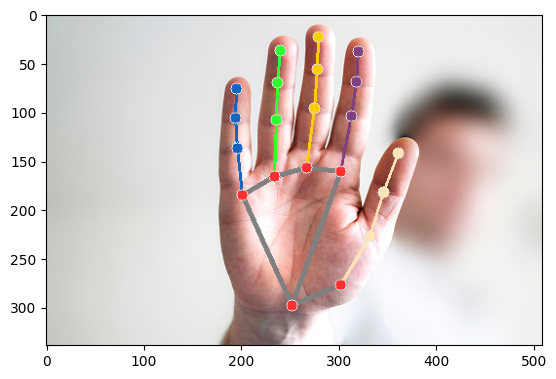

In [36]:
# Run MediaPipe Hands.
with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.7) as hands:
    for name, image in images.items():
        # Convert the BGR image to RGB, flip the image around y-axis for correct
        # handedness output and process it with MediaPipe Hands.
        results = hands.process(
            cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

        # Print handedness (left v.s. right hand).
        print(f'Handedness of {name}:')
        print(results.multi_handedness)

        if not results.multi_hand_landmarks:
            continue
        # Draw hand landmarks of each hand.
        print(f'Hand landmarks of {name}:')
        image_hight, image_width, _ = image.shape
        annotated_image = cv2.flip(image.copy(), 1)
        for hand_landmarks in results.multi_hand_landmarks:
            # Print index finger tip coordinates.
            print(
                f'Index finger tip coordinate: (',
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
            )
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())
        resize_and_show(cv2.flip(annotated_image, 1))


Hand world landmarks of ./imgs/hand-made-stop-sign-and-palms.jpg:


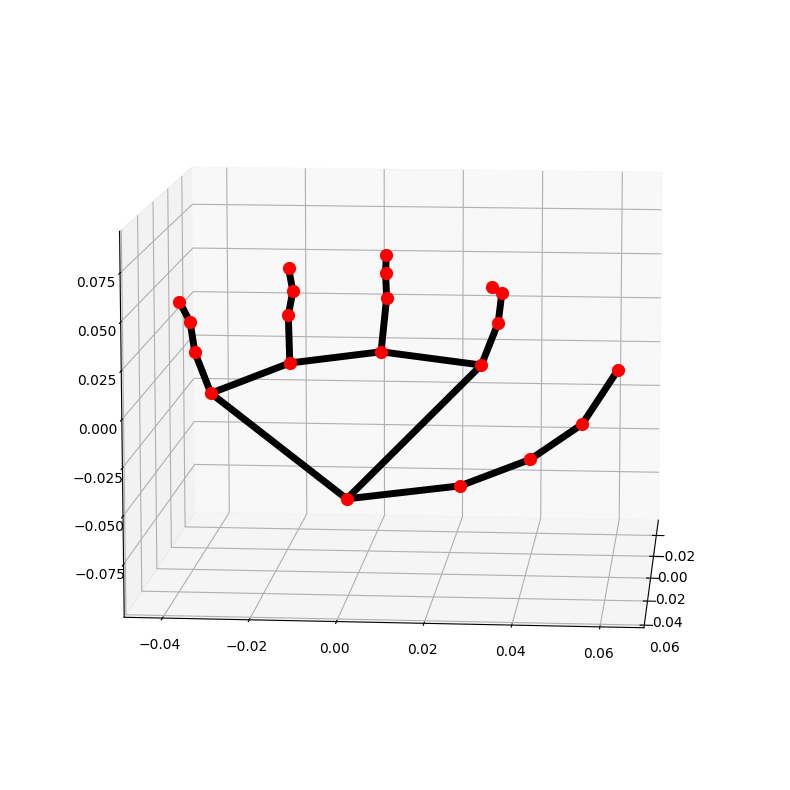

In [37]:
# Run MediaPipe Hands and plot 3d hands world landmarks.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Hands.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Draw hand world landmarks.
    print(f'Hand world landmarks of {name}:')
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

## Hand Landmarks
<https://google.github.io/mediapipe/solutions/hands#resources>
![](./hand_landmarks.png)